In [93]:
from mlxtend.data import loadlocal_mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import math
import random
import torch
from torch.autograd import Variable

In [2]:
data_path = 'F:/data/mnist/'
train_data = np.loadtxt(data_path + "mnist_train.csv", delimiter=',')
test_data = np.loadtxt(data_path + "mnist_test.csv", delimiter=',')
train_data = train_data[:50000, :]
print(train_data.shape)
print(test_data.shape)
x_train = train_data[:, 1:]
y_train = train_data[:, :1]
x_train = np.asfarray(x_train) * (1/255)
print(x_train.shape)
print(y_train.shape)
x_test = test_data[:, 1:]
x_test = np.asfarray(x_test) * (1/255)
y_test = test_data[:, :1]
print(x_test.shape)
print(y_test.shape)
## One-hot encoding of the labels
num_classes = 10
labels = np.arange(num_classes)

y_train = (labels==y_train).astype(np.int)
y_test = (labels==y_test).astype(np.int)

(50000, 785)
(10000, 785)
(50000, 784)
(50000, 1)
(10000, 784)
(10000, 1)


In [3]:
def graph(loss_list, accu_list):
    plt.plot(loss_list)
    plt.ylabel('Training Loss')
    plt.xlabel('Iterations')
    plt.xticks(rotation=60)
    plt.title('Loss Function')
    plt.show()
    plt.plot(accu_list)
    plt.ylabel('Test Accuracy')
    plt.xlabel('Iterations')
    plt.xticks(rotation=60)
    plt.title('Test Accuracy')
    plt.show()

In [4]:
def error(pred,y):
    loss = sum(np.square(y-pred))/2
    return loss

In [5]:
def evaluation(w, x_data, y_data):
    loss_list = []
    w = w.transpose()
    dist = np.array([np.squeeze(np.matmul(x_data[i], w)) for i in range(len(y_data))])
    result = np.argmax(dist,axis=1)
    y_label = np.argmax(y_data, axis=1)
    accuracy = sum(result == y_label)/float(len(y_data))
    loss_list = [error(dist[i],y_data[i]) for i in range(len(y_data))]
    loss = sum(loss_list)
    return loss, accuracy

In [6]:
def batch_grad(w, x_batch, y_batch):

    batch_size = x_batch.shape[0]
    w_grad_list = []
  
    batch_loss = 0
    for i in range(batch_size): # for each image
        x,y = x_batch[i],y_batch[i]
        x = x.reshape((784,1)) 
        y = y.reshape((10,1))  
        pred = np.matmul(w, x) 
        loss = error(pred, y)
        batch_loss += loss
    w_grad = y - pred
    w_grad = - np.matmul(w_grad, x.reshape((1,784)))
    w_grad_list.append(w_grad)


    dw = sum(w_grad_list)/batch_size
    batch_loss = batch_loss/batch_size
    return dw, batch_loss

In [90]:
def training(b_s, x_train, y_train, x_test, y_test):
  
    iters = 150
    batch_size = b_s
    learning_rate = [0.15]
  # selecting a random sequence of the training set
    print(iters)
    num_lr = len(learning_rate)
    loss_lr = np.zeros((num_lr, iters))
    acc_lr = np.zeros((num_lr, iters))

    for i in range(len(learning_rate)):
        w = np.zeros((10,784))
        for iter in range(iters):
            rand_indices = np.random.choice(x_train.shape[0],batch_size,replace=True)
            x_batch = x_train[rand_indices]
            y_batch = y_train[rand_indices]
            dw, batch_loss = batch_grad(w, x_batch, y_batch)       
            w -= learning_rate[i] * dw
            train_loss, train_accu = evaluation(w,x_train,y_train)
            test_loss, test_accu = evaluation(w,x_test,y_test)
            loss_lr[i][iter] = train_loss
            acc_lr[i][iter] = test_accu
            message = 'Iteration %d, Train Loss %.2f, Test Accu %.4f' % (iter+1, train_loss, test_accu)
            print(message)
    best_acc = np.argmax(acc_lr[:,iters-1])
    print('best learning rate for batch size %d is %.4f with an accuracy of %.4f'%(batch_size, learning_rate[best_acc], acc_lr[best_acc,iters-1]))
    graph(loss_lr[best_acc], acc_lr[best_acc])

    return

150
Iteration 1, Train Loss 30095.64, Test Accu 0.0980
Iteration 2, Train Loss 28544.99, Test Accu 0.1266
Iteration 3, Train Loss 26957.39, Test Accu 0.2202
Iteration 4, Train Loss 25550.18, Test Accu 0.1960
Iteration 5, Train Loss 24647.11, Test Accu 0.2505
Iteration 6, Train Loss 24350.22, Test Accu 0.2416
Iteration 7, Train Loss 23253.64, Test Accu 0.2430
Iteration 8, Train Loss 24546.47, Test Accu 0.2161
Iteration 9, Train Loss 27900.71, Test Accu 0.1732
Iteration 10, Train Loss 25399.99, Test Accu 0.2527
Iteration 11, Train Loss 27059.53, Test Accu 0.2348
Iteration 12, Train Loss 28660.69, Test Accu 0.2188
Iteration 13, Train Loss 26781.72, Test Accu 0.2428
Iteration 14, Train Loss 25972.65, Test Accu 0.2223
Iteration 15, Train Loss 26662.45, Test Accu 0.2250
Iteration 16, Train Loss 24851.62, Test Accu 0.2682
Iteration 17, Train Loss 23539.42, Test Accu 0.2956
Iteration 18, Train Loss 25149.38, Test Accu 0.2264
Iteration 19, Train Loss 29568.77, Test Accu 0.1343
Iteration 20, Tra

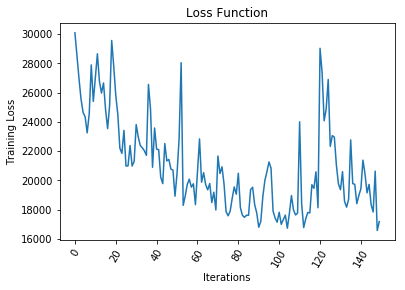

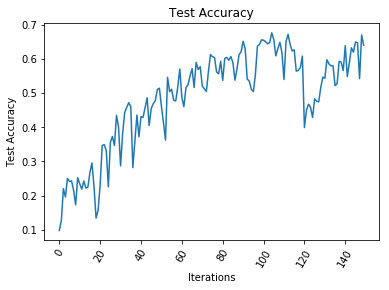

In [68]:
batch_size = [1]
for b_s in batch_size:
    training(b_s, x_train, y_train, x_test, y_test)

150
Iteration 1, Train Loss 25252.36, Test Accu 0.0982
Iteration 2, Train Loss 31404.42, Test Accu 0.0974
Iteration 3, Train Loss 30006.94, Test Accu 0.1679
Iteration 4, Train Loss 27271.94, Test Accu 0.2193
Iteration 5, Train Loss 28595.18, Test Accu 0.1493
Iteration 6, Train Loss 26390.63, Test Accu 0.1748
Iteration 7, Train Loss 25422.44, Test Accu 0.2054
Iteration 8, Train Loss 24940.45, Test Accu 0.1842
Iteration 9, Train Loss 23844.04, Test Accu 0.2278
Iteration 10, Train Loss 26121.85, Test Accu 0.1371
Iteration 11, Train Loss 25675.59, Test Accu 0.2126
Iteration 12, Train Loss 23453.71, Test Accu 0.2535
Iteration 13, Train Loss 24595.49, Test Accu 0.2516
Iteration 14, Train Loss 24576.59, Test Accu 0.1612
Iteration 15, Train Loss 24096.52, Test Accu 0.2171
Iteration 16, Train Loss 26917.35, Test Accu 0.1579
Iteration 17, Train Loss 28547.25, Test Accu 0.1368
Iteration 18, Train Loss 24359.34, Test Accu 0.1844
Iteration 19, Train Loss 23656.53, Test Accu 0.2560
Iteration 20, Tra

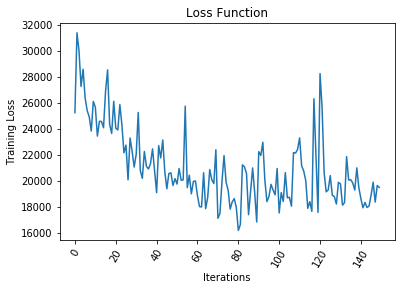

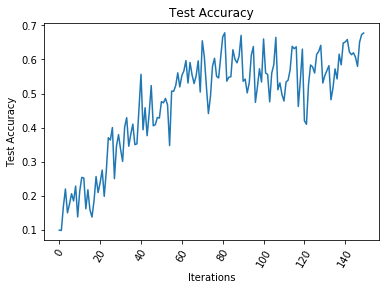

In [77]:
batch_size = [10]
for b_s in batch_size:
    training(b_s, x_train, y_train, x_test, y_test)

150
Iteration 1, Train Loss 24657.84, Test Accu 0.1010
Iteration 2, Train Loss 24392.09, Test Accu 0.1841
Iteration 3, Train Loss 24247.55, Test Accu 0.1860
Iteration 4, Train Loss 24024.37, Test Accu 0.2454
Iteration 5, Train Loss 23762.86, Test Accu 0.2984
Iteration 6, Train Loss 23723.93, Test Accu 0.2771
Iteration 7, Train Loss 23828.10, Test Accu 0.0892
Iteration 8, Train Loss 23479.31, Test Accu 0.1007
Iteration 9, Train Loss 23391.02, Test Accu 0.1424
Iteration 10, Train Loss 23009.26, Test Accu 0.1620
Iteration 11, Train Loss 22909.27, Test Accu 0.1896
Iteration 12, Train Loss 22993.38, Test Accu 0.1373
Iteration 13, Train Loss 23149.71, Test Accu 0.1061
Iteration 14, Train Loss 22835.62, Test Accu 0.1079
Iteration 15, Train Loss 22697.30, Test Accu 0.1416
Iteration 16, Train Loss 22628.62, Test Accu 0.1323
Iteration 17, Train Loss 22508.53, Test Accu 0.1803
Iteration 18, Train Loss 22654.07, Test Accu 0.1717
Iteration 19, Train Loss 22750.18, Test Accu 0.1891
Iteration 20, Tra

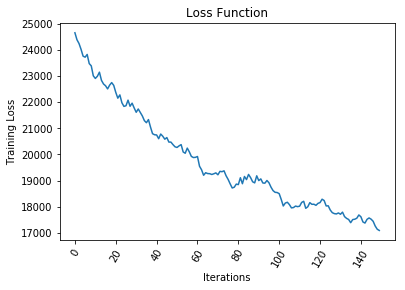

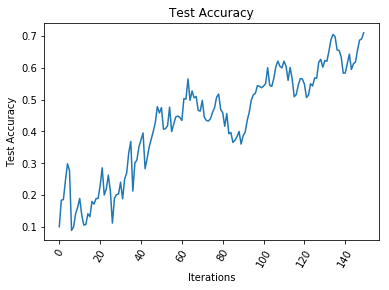

In [79]:
batch_size = [100]
for b_s in batch_size:
    training(b_s, x_train, y_train, x_test, y_test)

150
Iteration 1, Train Loss 24926.17, Test Accu 0.1032
Iteration 2, Train Loss 24873.51, Test Accu 0.1016
Iteration 3, Train Loss 24817.10, Test Accu 0.1931
Iteration 4, Train Loss 24772.90, Test Accu 0.1556
Iteration 5, Train Loss 24726.34, Test Accu 0.1032
Iteration 6, Train Loss 24687.37, Test Accu 0.1879
Iteration 7, Train Loss 24650.22, Test Accu 0.1947
Iteration 8, Train Loss 24613.07, Test Accu 0.1984
Iteration 9, Train Loss 24549.62, Test Accu 0.2019
Iteration 10, Train Loss 24513.52, Test Accu 0.1823
Iteration 11, Train Loss 24461.47, Test Accu 0.1825
Iteration 12, Train Loss 24415.79, Test Accu 0.1853
Iteration 13, Train Loss 24378.04, Test Accu 0.1922
Iteration 14, Train Loss 24349.68, Test Accu 0.1763
Iteration 15, Train Loss 24337.88, Test Accu 0.1842
Iteration 16, Train Loss 24289.73, Test Accu 0.1844
Iteration 17, Train Loss 24261.03, Test Accu 0.1699
Iteration 18, Train Loss 24215.34, Test Accu 0.1926
Iteration 19, Train Loss 24159.03, Test Accu 0.1952
Iteration 20, Tra

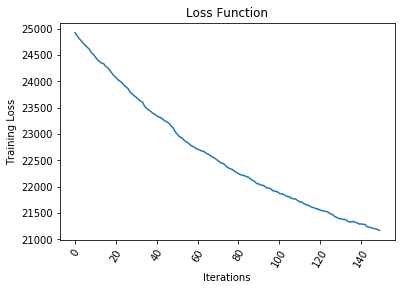

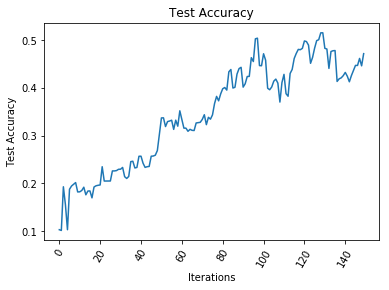

In [91]:
batch_size = [1000]
for b_s in batch_size:
    training(b_s, x_train, y_train, x_test, y_test)

In [96]:
print('A bigger batch size results in a smoother training i.e a less noisy loss function and training accuracy. ')
print('However the training time is longer for a larger batch size')

A bigger batch size results in a smoother training i.e a less noisy loss function and training accuracy. 
However the training time is longer for a larger batch size


In [62]:
permutation=list(np.random.choice(50000,100,replace=False))
p=list(np.random.choice(10000,100,replace=False))
x_train1 = x_train[permutation,:]
y_train1 = y_train[permutation,:]
permutation2=list(np.random.choice(50000,500,replace=False))
x_train2 = x_train[permutation2,:]
y_train2 = y_train[permutation2,:]
permutation3=list(np.random.choice(50000,1000,replace=False))
x_train3 = x_train[permutation3,:]
y_train3 = y_train[permutation3,:]
permutation4=list(np.random.choice(50000,10000,replace=False))
x_train4 = x_train[permutation4,:]
y_train4 = y_train[permutation4,:]

Training for Dataset size of 100
150
Iteration 1, Train Loss 49.50, Test Accu 0.1135
Iteration 2, Train Loss 49.01, Test Accu 0.1475
Iteration 3, Train Loss 48.26, Test Accu 0.1673
Iteration 4, Train Loss 47.46, Test Accu 0.1857
Iteration 5, Train Loss 47.68, Test Accu 0.1115
Iteration 6, Train Loss 46.30, Test Accu 0.1458
Iteration 7, Train Loss 45.42, Test Accu 0.2129
Iteration 8, Train Loss 43.84, Test Accu 0.2813
Iteration 9, Train Loss 43.39, Test Accu 0.2584
Iteration 10, Train Loss 43.10, Test Accu 0.1678
Iteration 11, Train Loss 43.19, Test Accu 0.1945
Iteration 12, Train Loss 43.20, Test Accu 0.1488
Iteration 13, Train Loss 42.60, Test Accu 0.2053
Iteration 14, Train Loss 42.45, Test Accu 0.2454
Iteration 15, Train Loss 41.88, Test Accu 0.2502
Iteration 16, Train Loss 40.97, Test Accu 0.2681
Iteration 17, Train Loss 40.97, Test Accu 0.1878
Iteration 18, Train Loss 40.61, Test Accu 0.2147
Iteration 19, Train Loss 40.39, Test Accu 0.2811
Iteration 20, Train Loss 40.78, Test Accu

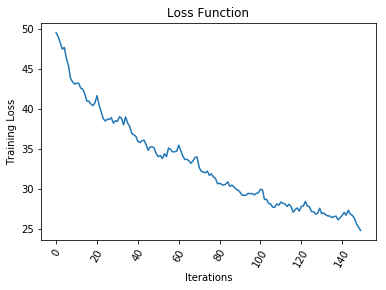

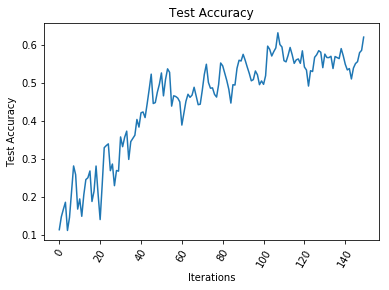

Training for Dataset size of 500
150
Iteration 1, Train Loss 247.37, Test Accu 0.1009
Iteration 2, Train Loss 244.18, Test Accu 0.1128
Iteration 3, Train Loss 242.13, Test Accu 0.1294
Iteration 4, Train Loss 237.09, Test Accu 0.1632
Iteration 5, Train Loss 236.67, Test Accu 0.1906
Iteration 6, Train Loss 234.98, Test Accu 0.2009
Iteration 7, Train Loss 231.39, Test Accu 0.2451
Iteration 8, Train Loss 229.10, Test Accu 0.2887
Iteration 9, Train Loss 232.40, Test Accu 0.1749
Iteration 10, Train Loss 230.55, Test Accu 0.2185
Iteration 11, Train Loss 225.53, Test Accu 0.2352
Iteration 12, Train Loss 222.19, Test Accu 0.2901
Iteration 13, Train Loss 221.08, Test Accu 0.2548
Iteration 14, Train Loss 220.69, Test Accu 0.2981
Iteration 15, Train Loss 217.49, Test Accu 0.3004
Iteration 16, Train Loss 216.70, Test Accu 0.3719
Iteration 17, Train Loss 217.44, Test Accu 0.3218
Iteration 18, Train Loss 214.91, Test Accu 0.3644
Iteration 19, Train Loss 216.53, Test Accu 0.2474
Iteration 20, Train Lo

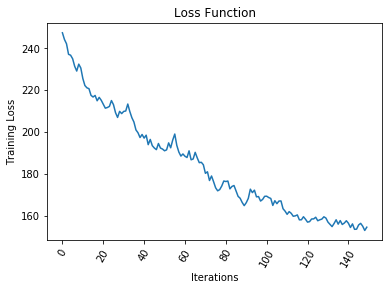

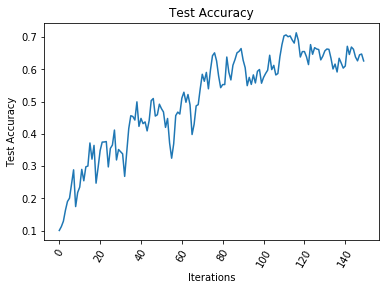

Training for Dataset size of 1000
150
Iteration 1, Train Loss 494.52, Test Accu 0.0892
Iteration 2, Train Loss 486.12, Test Accu 0.1050
Iteration 3, Train Loss 486.37, Test Accu 0.0984
Iteration 4, Train Loss 481.19, Test Accu 0.1176
Iteration 5, Train Loss 472.08, Test Accu 0.1254
Iteration 6, Train Loss 467.18, Test Accu 0.1533
Iteration 7, Train Loss 463.30, Test Accu 0.2333
Iteration 8, Train Loss 457.24, Test Accu 0.2882
Iteration 9, Train Loss 456.71, Test Accu 0.1818
Iteration 10, Train Loss 455.59, Test Accu 0.1654
Iteration 11, Train Loss 457.07, Test Accu 0.1768
Iteration 12, Train Loss 465.77, Test Accu 0.1139
Iteration 13, Train Loss 466.82, Test Accu 0.1813
Iteration 14, Train Loss 465.24, Test Accu 0.1901
Iteration 15, Train Loss 456.09, Test Accu 0.1937
Iteration 16, Train Loss 446.81, Test Accu 0.1977
Iteration 17, Train Loss 446.14, Test Accu 0.2382
Iteration 18, Train Loss 451.90, Test Accu 0.1644
Iteration 19, Train Loss 445.79, Test Accu 0.2552
Iteration 20, Train L

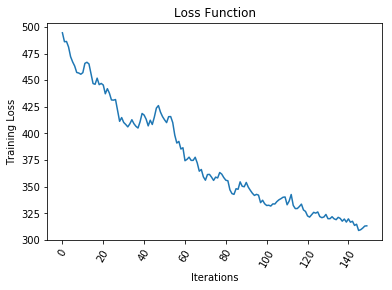

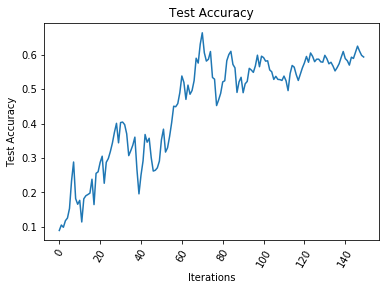

Training for Dataset size of 10000
150
Iteration 1, Train Loss 4927.72, Test Accu 0.1135
Iteration 2, Train Loss 4845.88, Test Accu 0.1755
Iteration 3, Train Loss 4763.07, Test Accu 0.2101
Iteration 4, Train Loss 4697.34, Test Accu 0.2656
Iteration 5, Train Loss 4682.72, Test Accu 0.1857
Iteration 6, Train Loss 4729.39, Test Accu 0.1010
Iteration 7, Train Loss 4642.38, Test Accu 0.1360
Iteration 8, Train Loss 4592.39, Test Accu 0.1413
Iteration 9, Train Loss 4494.56, Test Accu 0.1942
Iteration 10, Train Loss 4459.73, Test Accu 0.2079
Iteration 11, Train Loss 4445.46, Test Accu 0.2303
Iteration 12, Train Loss 4415.91, Test Accu 0.3331
Iteration 13, Train Loss 4370.51, Test Accu 0.3376
Iteration 14, Train Loss 4321.62, Test Accu 0.3446
Iteration 15, Train Loss 4309.60, Test Accu 0.3568
Iteration 16, Train Loss 4307.60, Test Accu 0.3943
Iteration 17, Train Loss 4323.71, Test Accu 0.2233
Iteration 18, Train Loss 4290.94, Test Accu 0.2647
Iteration 19, Train Loss 4252.99, Test Accu 0.3176
I

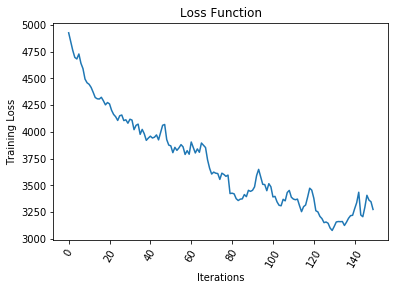

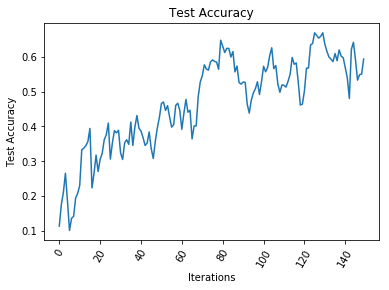

In [95]:
batch_size = [100]
for b_s in batch_size:
    print('Training for Dataset size of 100')
    training(b_s, x_train1, y_train1, x_test, y_test)
    print('Training for Dataset size of 500')
    training(b_s, x_train2, y_train2, x_test, y_test)
    print('Training for Dataset size of 1000')
    training(b_s, x_train3, y_train3, x_test, y_test)
    print('Training for Dataset size of 10000')
    training(b_s, x_train4, y_train4, x_test, y_test)

In [97]:
print('As the training data set size increases the accuracy also improves')

As the training data set size increases the accuracy also improves


In [1]:
batch_size=100
iteration=50
l_r=0.0025
train_loss=[]
test_acc=[]
model=torch.nn.Linear(784,10,bias=False)
err = torch.nn.MSELoss()
opt=torch.optim.SGD(model.parameters(),lr=l_r)
y_test_tensor=Variable(torch.from_numpy(y_test))
for i in range(iteration):
    rand_ind = np.random.choice(x_train.shape[0],batch_size,replace=True)
    x_batch1 = x_train[rand_ind]
    y_batch1 = y_train[rand_ind]
    x_train_images = Variable(torch.from_numpy(x_batch1))
    y_train_labels = Variable(torch.from_numpy(y_batch1))
    opt.zero_grad()
    out = model(x_train_images.float())
    loss = err(out, y_train_labels.float())
    loss.backward()
    opt.step()
    train_loss.append(loss)
    x_test_tensor=Variable(torch.from_numpy(x_test))
    predict = model(x_test_tensor.float())
    val1, y_predict = torch.max(predict,1)
    val2, y = torch.max(y_test_tensor,1)
    test_acc.append(sum(y_predict == y)/float(len(y)))

final_acc = "{:.2f}".format(100*(test_acc[-1]))
a = "Using pytorch Test accuracy is: "+str(final_acc)+"% "
plt.subplot(211)
plt.plot(train_loss)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')

plt.subplot(212)
plt.plot(test_acc)
plt.xlabel('Iterations')
plt.ylabel('Test Accuracy')
plt.suptitle(a)
plt.show()

NameError: name 'torch' is not defined